# Описание проекта

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Условия задачи:  
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.аются.

# 1. Загрузка и подготовка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [33]:
df_0 = pd.read_csv('geo_data_0.csv')
df_1 = pd.read_csv('geo_data_1.csv')
df_2 = pd.read_csv('geo_data_2.csv')

In [5]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
print(df_0.query('product == 0').count(), end='\n' * 3)
print(df_1.query('product == 0').count(), end='\n' * 3)
print(df_2.query('product == 0').count())

id         1
f0         1
f1         1
f2         1
product    1
dtype: int64


id         8235
f0         8235
f1         8235
f2         8235
product    8235
dtype: int64


id         1
f0         1
f1         1
f2         1
product    1
dtype: int64


Вторая таблица имкеет 8 235 нулевых запасов из 100 000

<AxesSubplot:>

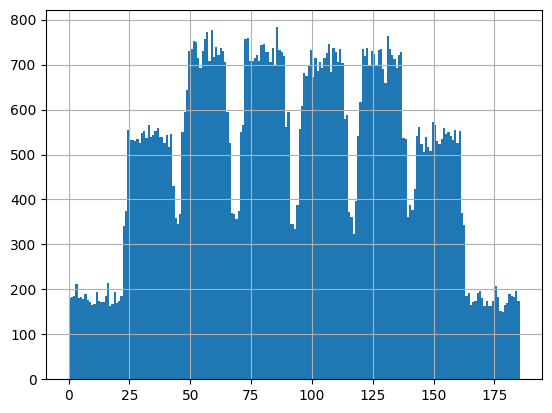

In [16]:
df_0['product'].hist(bins=200)

<AxesSubplot:>

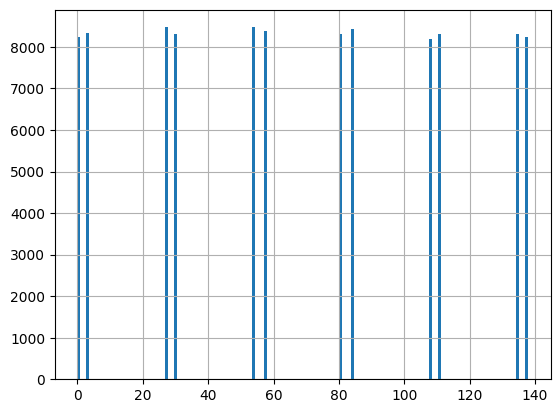

In [17]:
df_1['product'].hist(bins=150)

In [41]:
df_1['product'].value_counts().sort_values()

107.813044    8201
137.945408    8233
0.000000      8235
110.992147    8303
134.766305    8304
30.132364     8306
80.859783     8320
3.179103      8337
57.085625     8390
84.038886     8431
26.953261     8468
53.906522     8472
Name: product, dtype: int64

Равномерное распределение запасов

<AxesSubplot:>

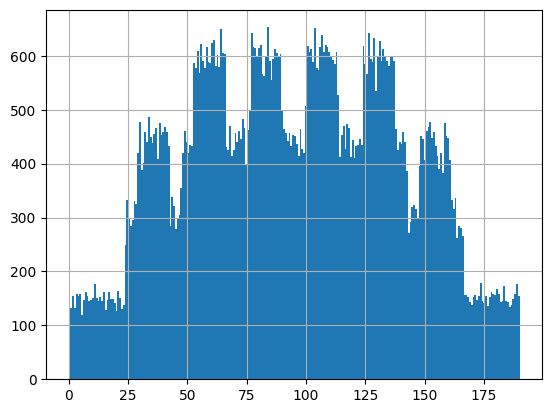

In [18]:
df_2['product'].hist(bins=250)

In [22]:
df_0['product'].nunique()

100000

In [23]:
df_2['product'].nunique()

100000

In [34]:
df_1['product'].nunique()

12

In [37]:
df_0.drop(columns=['id'], inplace=True)
df_1.drop(columns=['id'], inplace=True)
df_2.drop(columns=['id'], inplace=True)

Удалили лишние столбцы

In [38]:
print(df_0.duplicated().sum())
print(df_1.duplicated().sum())
print(df_2.duplicated().sum())

0
0
0


Данные изучены и готовы. Одина таблица с 12 уникальными целевыми признаками, продублированными чуть более 8 тыс. раз каждый, хотя у нас задача регрессии. Скорее всего данные таблицы df_1 выгружены не корректно, в дальнейшем проекте ее не будем использовать. Среди признаков нет категориальных, так же они имеют специфическую, неизвестную нам значимость, поэтому масштабировать мы их не будем.

# 2. Обучение и проверка модели

In [42]:
features_0 = df_0.drop(columns=['product'])
features_2 = df_2.drop(columns=['product'])
target_0 = df_0['product']
target_2 = df_2['product']

In [43]:
features_tr_0, features_val_0, target_tr_0, target_val_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=12345)
features_tr_2, features_val_2, target_tr_2, target_val_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=12345)

In [44]:
model_0 = LinearRegression()
model_2 = LinearRegression()
model_0.fit(features_tr_0, target_tr_0)
model_2.fit(features_tr_2, target_tr_2)
predicted_0 = model_0.predict(features_val_0)
predicted_2 = model_2.predict(features_val_2)

In [45]:
print('Первая модель')
print('Среднее количество сырья в локации 0:', predicted_0.mean())
print('RMSE_0 =', (mean_squared_error(target_val_0, predicted_0))**0.5)
print()
print('Для константной модели RMSE_0 =', (mean_squared_error(target_val_0, pd.Series(predicted_0.mean(), index=predicted_0))**0.5))

Первая модель
Среднее количество сырья в локации 0: 92.59256778438035
RMSE_0 = 37.5794217150813

Для константной модели RMSE_0 = 44.28900927907034


In [46]:
print('Третья модель')
print('Среднее количество сырья в локации 2:', predicted_2.mean())
print('RMSE_2 =', (mean_squared_error(target_val_2, predicted_2))**0.5)
print()
print('Для константной модели RMSE_2 =', (mean_squared_error(target_val_2, pd.Series(predicted_2.mean(), index=predicted_2))**0.5))

Третья модель
Среднее количество сырья в локации 2: 94.96504596800489
RMSE_2 = 40.02970873393434

Для константной модели RMSE_2 = 44.902157099150436


В регионе "3" среднее немного больше чем в регионе "1", но меньше значение среднеквадратической ошибки, поэтому однозначно сказать какой регион потенциально богаче сказать нельзя.

# 3. Подготовка к расчёту прибыли

In [47]:
budget = 10000000000
income_unit = 450000
n = 200
product = budget / (income_unit * n)
product

111.11111111111111

Среднее количество продукта для безубыточной разработкив данном месте

In [48]:
predicted_0.mean() > product

False

In [49]:
predicted_2.mean() > product

False

Ни в одном регионе нельзя разрабатывать все скважины, иначе мы уйдем в чистый убыток. Нужно выбрать наиболее большие.

# 4. Расчёт прибыли и рисков 

In [50]:
state = np.random.RandomState(12345)

Функция возвращает разницу между прибылью и доступным бюджетом

In [64]:
def oil_profit(target, probabilities):    #на вход подается столбец с настоящими данными и с предсказанными
    selected = target[probabilities.sort_values(ascending=False).index][:200]
    return (selected.sum() * income_unit) - budget 

Функция предсказания количества нефти в 500 случайно взятых точках региона  
Далее в данных 500 точках берется реальное количество запасов и передается вместе с предсказанием в функцию **oil_profit**  
В ней считается прибыль по реальному количеству запасов 200 крупнейших точек, по "мнению" модели 

In [74]:
def subsample(data, target, model, profit_distribution):
    data_subs = data.sample(n=500, random_state=state)
    target_subs = target.loc[data_subs.index]
    proba = model.predict(data_subs)
    proba = pd.Series(proba, index=target_subs.index)
    profit_distribution.append(oil_profit(target_subs, proba))

Далее формируем выборку из прибылей(убытков) для каждого региона

In [75]:
profit_distribution_0 = []
profit_distribution_2 = []
for i in range(1000):
    subsample(features_val_0, target_val_0, model_0, profit_distribution_0)
    subsample(features_val_2, target_val_2, model_2, profit_distribution_2)

In [76]:
profit_distribution_0 = pd.Series(profit_distribution_0)
profit_distribution_2 = pd.Series(profit_distribution_2)

In [77]:
print('Средняя прибыль в первой области:', profit_distribution_0.mean())
print('95%-ый доверительный интервал:', profit_distribution_0.quantile(0.025), profit_distribution_0.quantile(0.975))
print('Риск убытков:', ((profit_distribution_0 < 0).mean()*100), "%")

Средняя прибыль в первой области: 389966247.53774977
95%-ый доверительный интервал: -88165205.21668133 885809431.5222312
Риск убытков: 5.7 %


In [78]:
print('Средняя прибыль в третьей области:', profit_distribution_2.mean())
print('95%-ый доверительный интервал:', profit_distribution_2.quantile(0.025), profit_distribution_2.quantile(0.975))
print('Риск убытков:', ((profit_distribution_2 < 0).mean()*100), '%')

Средняя прибыль в третьей области: 403444857.11523545
95%-ый доверительный интервал: -131761617.24412552 892074373.0932637
Риск убытков: 6.7 %


# Вывод

Для исследования риска убытков подошли только 2 региона. При предсказании линейной регрессией выборки из региона 500 точек и выбора 200 лучших посчитали из 1000 выборок долю убыточных:  
 - в первом регионе 5.7%
 - в третьем регионе 6.7%

В нашей интерпретации это и есть доля риска.